# Numpy


이 튜토리얼은 Justin Johnson에 의해 최초로 작성되고, Volodymyr Kuleshov, Isaac Caswell, 그리고 Kevin Zakka에 의해 수정된 버전을 이 수업에 맞게 다시 수정한 것이다. 다음과 같은 내용을 다룬다.

- Numpy
  - 기본적 사용법
  - 인덱싱(indexing)
  - 산술연산
  - Broadcasting
- Matplotlib: Plotting, Subplots, Images

## Numpy 배열

- Numpy는 파이썬이 과학계산분야에 이용될때 핵심 역할을 하는 라이브러리이다.
- Python의 리스트가 배열과 유사한 역할을 할 수 있지만 리스트는 처리속도가 느리다. 고성능이 필요한 상황에는 Numpy 배열이 적합하다.
- Numpy는 **동일한 자료형의 데이터를 저장**하는 다차원 배열을 제공한다

### 설치와 `import`하기

Colab에는 이미 설치되어 있다. PC에서 Numpy 패키지는 다음의 명령으로 설치할 수 있다.

`$ pip install numpy`

Numpy를 사용하려면 먼저 다음과 같이 `numpy` 패키지를 import해야 한다.

In [ ]:
import numpy as np
print(np.__version__)

1.22.4


### 배열의 생성, 그리고 rank와 shape

파이썬의 리스트로부터 Numpy 배열을 생성할 수 있다.

배열의 원소들은 정수들의 튜플(tuple)로 색인(indexing) 된다.

배열은 `ndim`, `shape`, `dtype`등의 속성을 지닌다. `ndim` 혹은 rank는 배열이 몇 차원인지를 의미하고, `shape`은 각 차원 별 크기를 나타내는 튜플이다. `dtype`은 배열에 저장된 데이터의 타입이다. 배열이 `dtype` 속성을 가진다는 것은 Python 리스트와 달리 배열은 단일 타입의 데이터만 저장한다는 의미이다. Numpy 배열은 대부분의 경우 수(정수, 실수)를 저장하는 용도로 사용된다.

In [ ]:
a = np.array([1, 2, 3])   # rank 1인 배열의 생성
print(type(a))
print(a)
print(a[0], a[1], a[2])   # []를 이용해 배열의 각각의 값에 접근

print(a.ndim)             # 모든 배열은 rank를 나타내는 속성 ndim을 가짐
print(a.shape)            # 모든 배열은 shape이라는 속성을 가짐
print(a.dtype)            # 모든 배열은 데이터 타입을 나타내는 dtype 속성을 가짐

a[0] = 5                  # 배열의 값을 변경
print(a)

<class 'numpy.ndarray'>
[1 2 3]
1 2 3
<class 'numpy.ndarray'>
1
(3,)
int64
[5 2 3]


In [ ]:
b = np.array([[1,2,3],[4,5,6]])   # rank 2인 배열의 생성
print(b)
print(b.ndim)
print(b.shape)
print(b.dtype)

l = [[1,2,3],
     [4,5,6]]
print(l[0][0])

print(b[0, 0], b[0, 1], b[1, 0])        # 다차원 배열에서 각각의 값에 접근

print(b[(0, 0)], b[(0, 1)], b[(1, 0)])  # 다차원 배열에서 각각의 값에 접근

[[1 2 3]
 [4 5 6]]
2
(2, 3)
int64
1
1 2 4
1 2 4


In [ ]:
c = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]])
print(c.ndim)
print(c.shape)
print(c)

print(c[0, 1, 2], c[(0, 1, 2)])

3
(2, 2, 3)
[[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]]
6 6


Numpy는 배열을 생성하고 특정한 값으로 초기화하는 다양한 함수를 제공한다.

In [ ]:
a = np.zeros((2, 2), dtype=int)   # 0으로 채워진 2*2 크기의 2차원 배열을 생성
print(a)
print(a.dtype)        # 데이터 타입은 실수가 된다.

[[0 0]
 [0 0]]
int64


In [ ]:
b = np.ones((1, 2))    # 모든 원소가 1인 1*2 크기의 2차원 배열
                      # b는 첫번째 차원의 길이가 1인 2차원 배열이다. 이것은 1차원 배열과는 다르다.
print(b)              # 이 배열이 어떻게 출력되는지 확인하라.

[[1. 1.]]


In [ ]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [ ]:
d = np.eye(3)        # Create a 2x2 identity matrix
print(d)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.54106801 0.44953836]
 [0.38612488 0.38952944]]


Numpy 배열에는 **동일한 타입**의 값들이 저장된다. Numpy는 배열이 생성될 때 자료형을 스스로 추측한다. 하지만 배열을 생성할 때 명시적으로 특정 자료형을 지정할 수도 있다.

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=int)  # Force a particular datatype
w = np.array([1, 2], dtype=np.float32)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype, w.dtype)

int64 float64 int64 float32


**참조: Numpy 표준 데이터 타입**

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)|
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)|
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)|
| ``int8``      | Byte (-128 to 127)|
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)|
| ``uint8``     | Unsigned integer (0 to 255)|
| ``uint16``    | Unsigned integer (0 to 65535)|
| ``uint32``    | Unsigned integer (0 to 4294967295)|
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)|
| ``float_``    | Shorthand for ``float64``.|
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa|
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa|
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa|
| ``complex_``  | Shorthand for ``complex128``.|
| ``complex64`` | Complex number, represented by two 32-bit floats|
| ``complex128``| Complex number, represented by two 64-bit floats|

### 배열 reshape

Numpy배열은 **원소의 개수가 유지되는 경우** 자유롭게 다른 shape으로 변경할 수 있다. 가령 (3, 4) 크기의 2차원 배열은 (2, 6) 크기의 2차원 배열이나, 길이가 12인 1차원 배열, 혹은 (2, 2, 3) 크기의 3차원배열로 쉽게 변형할 수 있다.



In [ ]:
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]) # shape = (4,3)
print(arr)

arr1 = np.reshape(arr, (12))    # arr1 = arr.reshape(12)
print(arr1)

arr2 = np.reshape(arr, (2, 6))  # arr2 = arr.reshape(2, 6)
print(arr2)

arr3 = np.reshape(arr, (2, 2, 3))   # arr3 = arr.reshape(2, 2, 3)
print(arr3)

arr4 = np.reshape(arr, (3, 2, 2))   # arr4 = arr.reshape(3, 2, 2)
print(arr4)

# arr5 = np.reshape(arr, (3, 3))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]


배열 reshape은 배열을 복사하여 새로운 배열을 생성하는게 아니라 존재하는 배열에 대한 새로운 view를 제공할 따름이다.

In [ ]:
arr3[0, 0, 0] = 99
print(arr)

[[99  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


배열 reshape에서 원소의 개수는 보존되어야 하므로 **모든 차원의 크기를 명시할 필요는 없다**. 즉, 자동으로 유추할 수 있는 경우에는 크기를 명시하지 않고 `-1`로 표시할 수 있다.

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
newarr = np.reshape(arr, (-1, 2, 2))
print(newarr)

# wrongreshape = arr.reshape(2, -1, -1)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


가장 자주 사용하는 reshape은 다차원 배열을 1차원 배열로 reshape하는 경우이다. Numpy는 이를 위한 몇 가지 방법을 제공한다.

In [ ]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

newarr = arr.reshape(-1)
print(newarr)

print(np.ravel(arr))
print(arr.ravel())
# print(np.flatten(arr))
print(arr.flatten())

[1 2 3 4 5 6]
[1 2 3 4 5 6]
[1 2 3 4 5 6]
[1 2 3 4 5 6]


### 배열 슬라이싱(slicing)


파이썬 리스트와 유사하게 Numpy 배열도 슬라이싱이 가능하다. Numpy 배열은 다차원인 경우가 많기에, 각 차원별로 어떻게 슬라이스할건지 명확히 해야 한다.

In [ ]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)
# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1::2]  # [ )
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[2 4]
 [6 8]]


Numpy 배열의 슬라이싱은 리스트의 슬라이싱과 달리 새로운 배열을 생성하지 않는다. 다만 **기존 배열에 대한 새로운 view를 제공할 뿐이다**. 따라서 슬라이스된 배열의 값을 수정하면 원래 배열의 값도 수정된다.

In [ ]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a)

2
[[ 1 77  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


정수 인덱스와 슬라이스 인덱스를 섞어서 함께 사용할 수 있다. 이 경우 배열의 rank가 감소하게 될 것이다.

In [ ]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [ ]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a

print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)


In [ ]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


### 배열 합치기

#### Concatenate 함수로 배열 합치기

Numpy는 둘 이상의 배열을 **특정 축(axis)을 따라서** 합치는 `concatenate` 메서드를 제공한다. 배열들은 동일한 rank를 가져야 하며, 합쳐질 축을 제외한 나머지 축으로는 동일한 길이를 가져야 한다. 만들어진 배열은 입력된 배열과 동일한 rank를 가진다.

In [ ]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5])
arr3 = np.array([6, 7, 8, 9])

arr = np.concatenate((arr1, arr2, arr3))

print(arr)

[1 2 3 4 5 6 7 8 9]


배열을 합칠 축을 지정할 수 있다. 축이 지정되지 않으면 디폴트로 `axis=0`으로 간주된다.

In [ ]:
arr1 = np.array([[1, 2],
                 [3, 4]])
arr2 = np.array([[5, 6],
                 [7, 8]])
arr3 = np.concatenate((arr1, arr2))
print(arr3)

arr4 = np.concatenate((arr1, arr2), axis=1)
print(arr4)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[[1 2 5 6]
 [3 4 7 8]]


#### Stack 함수로 배열 쌓기

`stack` 함수는 배열들을 새로운 축으로 합치는 일을 한다. 예를 들어 1차원 배열들을 합쳐서 2차원 배열을 만들거나, 2차원 배열들을 여러 개 합쳐서 3차원 배열을 합치거나 등이다. 합쳐질 배열들은 모두 동일한 shape이어야 한다.

In [ ]:
arr1 = np.array([1,
                 2,
                 3])
arr2 = np.array([4,
                 5,
                 6])
arr3 = np.stack([arr1, arr2])
print(arr3)

arr4 = np.stack((arr1, arr2), axis=1)
print(arr4)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


In [ ]:
arr5 = np.stack((arr4, arr4), axis=1)
arr5

array([[[1, 4],
        [1, 4]],

       [[2, 5],
        [2, 5]],

       [[3, 6],
        [3, 6]]])

### 정수 배열 인덱싱(Integer Array Indexing)

배열에서 하나의 **단일한 원소를 엑세스할 경우에 tuple로 인덱싱**한다.  

하지만 배열을 다른 정수 배열(들)로(혹은 정수 배열로 암묵적으로 변환될 수 있는 리스트로) 인덱싱할 수 있다. 이것은 **배열에 저장된 여러 개의 값을 한꺼번에 뽑아내어서 다른 하나의 배열을 생성**하려는 목적이다.

배열을 슬라이싱하면 결과로 얻어지는 배열은 원본 배열의 연속적인 부분 배열이거나 혹은 일정한 규칙을 따라서(가령 한 칸씩 건너서 등) 잘라낸 형태이다.
그러나 정수 배열 인덱싱을 하면 불규칙적으로 원본 배열의 일부를 뽑내거나 원본과 다른 배열을 만들 수도 있다.

**중요**: 슬라이싱은 단지 원본 배열에 대한 새로운 view를 생성하는 것에 지나지 않지만, 정수배열인덱싱은 새로운 배열 객체를 생성한다.

#### 1차원 배열에 대한 정수 배열 인덱싱

인덱스로 사용된 배열의 각 값은 그 자리에 올 원래 배열의 값의 위치를 표시한다.

In [ ]:
x = np.arange(10, 1, -1)  # x = np.array([10,  9,  8,  7,  6,  5,  4,  3,  2])
print(x)

# range()

print(x[ np.array([3, 3, 1, 8]) ])

print(x[ [3, 3, 1, 8] ])    # 리스트는 배열로 암묵적으로 변환가능하므로 동일하다.

[10  9  8  7  6  5  4  3  2]
[7 7 9 2]
[7 7 9 2]


음수 인덱스도 물론 사용 가능하다.

In [ ]:
print(x[np.array([3, 3, -3, 8])])

[7 7 4 2]


1차원 배열을 다차원 배열로 인덱싱할 수도 있다. 이 경우 **리턴되는 결과는 항상 인덱스 배열과 동일한 shape**의 배열이며, 값은 인덱스 배열에 의해서 지정한 값들이다.

In [ ]:
 # x = np.array([10,  9,  8,  7,  6,  5,  4,  3,  2])
print(x[ np.array([[1,1],[2,3]]) ])     # 1차원 배열을 2차원 배열로 인덱싱한 경우

[[9 9]
 [8 7]]


#### 다차원 배열에 대한 정수 배열 인덱싱

다차원 배열이 배열로 인덱싱될 때는 좀 더 규칙이 복잡해진다. 우선 가장 간단한 경우는 **원래 배열의 차원의 개수, 즉 rank개의 인덱스 배열로 제공되고, 모든 인덱스 배열들이 동일한 shape을 가지는 경우**이다.

이 경우 결과는 인덱스 배열과 동일한 shape을 가진다. 또한 결과 배열의 값은 각각의 차원에 대해서 그 차원에 대응하는 인덱스 배열의 값을 인덱스로 하는 값이다.

In [ ]:
y = np.arange(35).reshape(5,7)
print(y)
print(y[  np.array([0,2,4]), np.array([0,1,2])  ])
# print(y[[0,2,4], [0,1,2]])

print(y[ np.array([[0, 1], [2, 3]]), np.array([[4, 5], [2, 3]]) ])


[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]]
[ 0 15 30]
[[ 4 12]
 [16 24]]


인덱스 배열들이 서로 동일한 shape이 아닐 경우에는 그들을 동일한 shape으로 만들기 위해서 broadcast를 시도한다. 아직 broadcast에 대해 다루지 않았으므로 이 부분은 생략한다.


원래 **배열의 rank보다 적은 개수의 인덱스 배열**을 사용하여 인덱싱할 수도 있다.

In [ ]:
print(y[np.array([0, 4, 1, 0])])

[[ 0  1  2  3  4  5  6]
 [28 29 30 31 32 33 34]
 [ 7  8  9 10 11 12 13]
 [ 0  1  2  3  4  5  6]]


이 경우 인덱스 배열에 있는 값에 해당하는 행(row)들을 선택하여 새로운 배열을 만들어서 반환한다. 이 기능은 주어진 배열의 특정 행만을 뽑아서 새로운 배열을 구성할 때 유용하다.

이 외에도 배열인덱싱을 활용하는 많은 use case들이 있다. 상세한 사항은 [문서](https://numpy.org/doc/stable/reference/arrays.indexing.html)를 참조하라.

**예:** 랜덤 포인트의 선택

정수배열 인덱싱의 한 예로 랜덤 포인트들을 샘플링해보자. 먼저 다음과 같이 평균 `mean`과 공분산(covariance) `cov`로 정의되는 2차원 정규분포를 따르는 100개의 점들을 생성한다.

In [ ]:
rand = np.random.RandomState(42) # random number generator의 초기화

mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

`pyplot`을 이용하여 플롯팅해보자.

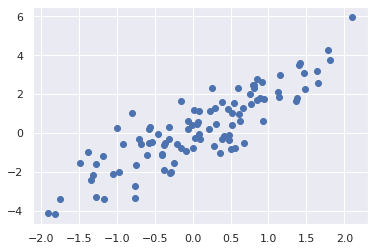

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1]);

정수 배열 인덱싱을 이용하여 20개의 랜덤 포인트를 선택한다.
먼저 랜덤 인덱스를 생성하고, 이것을 이용하여 랜덤 포인트를 샘플링한다.

In [ ]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([ 2, 44, 18, 68, 81, 95, 78, 15, 23, 50, 59, 85, 45, 58,  9, 11,  3,
       77, 88,  0])

In [ ]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

선택된 점들을 시각화해보자. 선택된 점들은 빨간색으로 표시하였다.

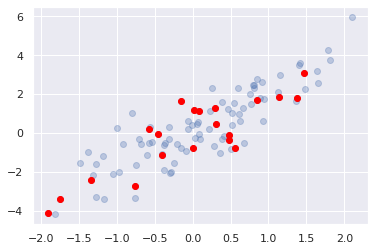

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='red')

### 불리언 배열 인덱싱(Boolean array indexing)

불리언 배열 인덱싱을 통해 배열 속 요소를 취사선택할 수 있다. 불리언 배열 인덱싱은 특정 조건을 만족하게 하는 요소만 선택하고자 할 때 자주 사용된다.

In [ ]:
import numpy as np

a = np.array([[1, 2],
              [3, 4],
              [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[ bool_idx ])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


### 배열 연산(Array math)

Numpy 배열에 대한 사칙연산 등의 기본적인 수학 연산이나 함수는 배열의 각 요소별로(elementwise) 동작한다.

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [ ]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [ ]:
# Elementwise product; both produce the array
print(x * y)
print(x * 2)
print(np.multiply(x, y))

# a = [1, 2, 3]
# print(a * 2)

[[ 5. 12.]
 [21. 32.]]
[[2. 4.]
 [6. 8.]]
[[ 5. 12.]
 [21. 32.]]


In [ ]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [ ]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


즉, `*`은 행렬 곱이 아니라 요소별 곱이다. Numpy에선 벡터의 내적, 벡터와 행렬의 곱을 위해서는 `*`대신 ‘dot’함수를 사용해야 한다. ‘dot’은 Numpy 모듈 함수로서도 배열 객체의 인스턴스 메소드로서도 이용 가능하다.

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

print(x.dot(y))
print(x.dot(v))

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

[[19 22]
 [43 50]]
[29 67]
219
219


`@`연산자는 numpy의 `dot` 연산자와 동일하다.

In [ ]:
print(v @ w)

219


In [ ]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


In [ ]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy는 `sum`, `max`, `min`, `mean`, `std` 등의 많은 유용한 함수들을 제공한다.

In [ ]:
x = np.array([[1,2],
              [3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


In [ ]:
print(np.max(x))
print(np.max(x, axis=1))
print(np.min(x))
print(np.min(x, axis=0))

print(np.mean(x))
print(np.mean(x, axis=0))

print(np.std(x))
print(np.std(x, axis=1))


4
[2 4]
1
[1 2]
2.5
[2. 3.]
1.118033988749895
[0.5 0.5]


행렬에서 자주 사용되는 연산의 하나는 전치행렬을 구하는 것이다. 행렬을 전치하기 위해선, 간단하게 배열 객체의 ‘T’ 속성을 사용하면 된다.

In [ ]:
print(x)
print("transpose\n", x.T)

[[1 2]
 [3 4]]
transpose
 [[1 3]
 [2 4]]


In [ ]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

[[1 2 3]]
transpose
 [[1]
 [2]
 [3]]


### 요약(Aggregations): Min, Max 등

NumPy 배열은 다양한 요약(aggregation) 함수를 제공한다. 많은 양의 데이터에 대해서 평균, 표준편차 등의 기술적 통계를 살펴보는데 도움이 된다.

In [ ]:
L = np.random.random(100)
sum(L)

47.95910055827258

In [ ]:
np.sum(L)

47.95910055827259

Python 자체가 제공하는 `sum` 등의 빌트인 함수에 비해 매우 효율적이다.

In [ ]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

The slowest run took 4.53 times longer than the fastest. This could mean that an intermediate result is being cached.
179 ms ± 83.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
444 µs ± 101 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
np.min(big_array), np.max(big_array)

(2.3570765756986134e-06, 0.9999998613712157)

In [ ]:
%timeit min(big_array)
%timeit np.min(big_array)

60.8 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
466 µs ± 17.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


``min``, ``max``, ``sum`` 등의 NumPy 함수들은 다음과 같이 좀 더 간명한 표현도 지원한다.

In [ ]:
print(big_array.min(), big_array.max(), big_array.sum())

1.7607437372557655e-06 0.9999990410109624 500027.28998925805


**다차원 배열의 경우**

In [ ]:
M = np.random.random((3, 4))
print(M)

[[0.18216473 0.76620383 0.19081788 0.03251326]
 [0.50854411 0.30724075 0.25941316 0.78632929]
 [0.06599357 0.28151237 0.1003713  0.17446613]]


요약 연산을 수행할 축을 지정하지 않으면 배열 전체에 대개서 이루어진다.

In [ ]:
print(M.sum())
print(M.mean())
print(M.min())
print(M.max())

3.6555703802460853
0.3046308650205071
0.032513263359063904
0.7863292903056448


요약을 수행할 축(axis)을 지정할 수 있다.  

In [ ]:
print(M.min(axis=0))
print(M.max(axis=0))
print(M.mean(axis=0))

[0.06599357 0.28151237 0.1003713  0.03251326]
[0.50854411 0.76620383 0.25941316 0.78632929]
[0.25223414 0.45165232 0.18353411 0.33110289]


In [ ]:
print(M.min(axis=1))
print(M.max(axis=1))
print(M.mean(axis=1))

[0.03251326 0.25941316 0.06599357]
[0.76620383 0.78632929 0.28151237]
[0.29292493 0.46538183 0.15558584]


**다른 요약 함수들**

|Function Name      |  Description        |
|-------------------|---------------------|
| ``np.sum``        | Compute sum of elements                       |
| ``np.prod``       | Compute product of elements                   |
| ``np.mean``       | Compute mean of elements                      |
| ``np.std``        | Compute standard deviation                    |
| ``np.var``        | Compute variance                              |
| ``np.min``        | Find minimum value                            |
| ``np.max``        | Find maximum value                            |
| ``np.argmin``     | Find index of minimum value                   |
| ``np.argmax``     | Find index of maximum value                   |
| ``np.median``     | Compute median of elements                    |
| ``np.percentile`` | Compute rank-based statistics of elements     |
| ``np.any``        | Evaluate whether any elements are true        |
| ``np.all``        | Evaluate whether all elements are true        |


### Broadcasting

브로트캐스팅은 Numpy에서 shape이 다른 배열 간에도 산술 연산이 가능하게 하는 메커니즘이다. 종종 작은 배열과 큰 배열이 있을 때, 큰 배열을 대상으로 작은 배열을 여러 번 연산하고자 할 때가 있다. 예를 들어, 배열의 모든 원소에 스칼라 값을 더하거나 곱하거나, 혹은 행렬의 각 행에 상수 벡터를 더하고 싶은 경우 등이 있다.

Numpy 브로드캐스팅을 이용한다면 다음과 같이 간단하게 할 수 있다.

In [ ]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(x + 2)      # add a scalar to an array
print(x * 2)      # multiply a scalar

v = np.array([1, 0, 2])
y = x + v         # Add v to each row of x using broadcasting
print(y)

[[ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]
 [20 22 24]]
[[ 2  2  5]
 [ 5  5  8]
 [ 8  8 11]
 [11 11 14]]


`x`의 `shape`이 `(4, 3)`이고 `v`의 `shape`이 `(3,)`이라도 브로드캐스팅으로 인해 `y = x + v`는 문제없이 수행된다; 이때 `v`는 `v`의 복사본이 차곡차곡 쌓인 `shape` `(4, 3)`처럼 간주되어 `x`와 동일한 `shape`이 되며 이들 간의 요소별 덧셈연산의 결과가 `y`에 저장된다.

두 배열의 브로드캐스팅은 아래의 규칙을 따른다:

1. 두 배열이 동일한 rank를 가지고 있지 않다면, 낮은 rank의 배열의 shape앞에 1을 연속적으로 추가하여 두 배열의 rank를 동일하게 만든다.
2. 특정 차원에서 두 배열이 동일한 크기를 갖거나, 두 배열 중 하나의 크기가 1이라면 그 두 배열은 그 차원에서 compatible하다고 한다.
3. 두 행렬이 모든 차원에서 compatible하다면, 브로드캐스팅이 가능하다.
4. 브로드캐스팅이 이뤄지면, 두 배열 shape의 요소별 최대값으로 이루어진 shape이 두 배열의 shape으로 간주된다.
5. 차원에 상관없이 크기가 1인 배열과 1보다 큰 배열이 있을 때, 크기가 1인 배열은 자신의 차원 수만큼 복사되어 쌓인 것처럼 간주한다.

더 자세한 설명은 [scipy문서](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)나 [scipy위키](http://wiki.scipy.org/EricsBroadcastingDoc)를 참조하라.

##Matplotlib

Matplotlib는 **plotting 라이브러리**이다. 여기서는 `matplotlib.pyplot` 모듈에 관한 간략하게 소개한다. 먼저 아래와 같이 `import`한다.

In [ ]:
import matplotlib.pyplot as plt

다음과 같이 특별한 iPython command를 실행함으로써 Jupyter Notebook이나 Colab에서 inline으로 챠트들을 디스플레이할 수 있다.

In [ ]:
%matplotlib inline

###Plotting

 `matplotlib`에서 가장 중요한 기능은 2차원 데이터를 그래프로 그릴 수 있게 해주는 `plot`이다.

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4]
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87157577 -0.91616594 -0.95160207 -0.97753012 -0.993691   -0.99992326
 -0.99616461 -0.98245261 -0.9

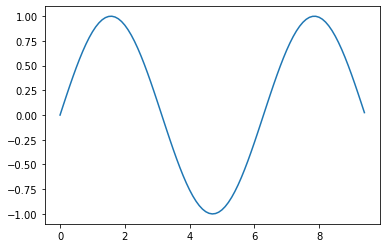

In [ ]:
import numpy as np
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
print(x)
y = np.sin(x)
print(y)

# Plot the points using matplotlib
plt.plot(x, y)

아래와 같이 여러 개의 함수를 한 번에 디스플레이 할 수 있다. 또한 타이틀이나 범례(legend)를 달거나 축 라벨(axis label)을 붙일 수도 있다.

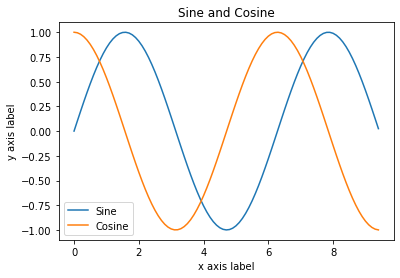

In [ ]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

###Subplots

`subplot`함수를 통해 하나의 그림 위에 여러 개의 차트를 나타낼 수 있다.

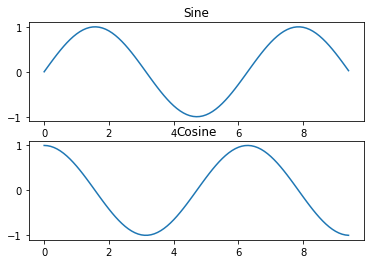

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

`subplot` 함수에 대한 자세한 설명은 [문서](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)를 참조하라.

### 이미지(image) 디스플레이 하기

`pyplotlib`의 `imshow`함수를 사용해 이미지를 디스플레이 할 수 있다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<class 'numpy.ndarray'>
(187, 269, 3)


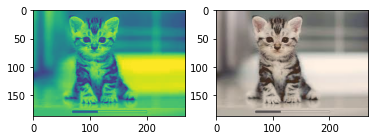

In [ ]:
import numpy as np
# from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

img = imread('/content/drive/MyDrive/DataScience2022/chap02/cat.jpg')
print(type(img))
print(img.shape)

img_tinted = img * [1, 0.95, 0.9]

# 원본 이미지 나타내기
plt.subplot(1, 2, 1)
plt.imshow(img)

# 색변화된 이미지 나타내기
plt.subplot(1, 2, 2)

# imshow를 이용하며 주의할 점은 데이터의 자료형이
# uint8이 아니라면 이상한 결과를 보여줄 수도 있다는 것이다.
# 그러므로 이미지를 나타내기 전에 명시적으로 자료형을 uint8로 형변환 해준다.

plt.imshow(np.uint8(img_tinted))
plt.show()

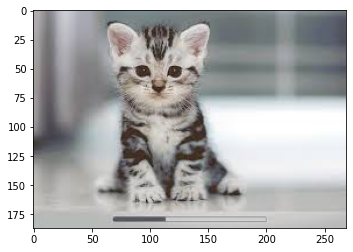

In [ ]:
from PIL import Image
from urllib.request import urlopen

# url = 'https://newevolutiondesigns.com/images/freebies/colorful-background-14.jpg'
url = 'https://github.com/ohheum/DS2020/blob/master/assets/cat.jpg?raw=true'
img = Image.open(urlopen(url))
plt.imshow(img)
plt.show()
